In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import xarray as xr

In [2]:
### Point to data
in_dir = Path('/scratch/orybchuk/wakedynamics/bcs-ldm/simulations/072415/large_campaigns/precursor/postprocessing/for_pytorch_wide_5_704_32')
fx_in = Path(in_dir, 'x_0002_00.npy')
fy_in = Path(in_dir, 'y_0002_00.npy')
x_in = np.load(fx_in)
y_in = np.load(fy_in)

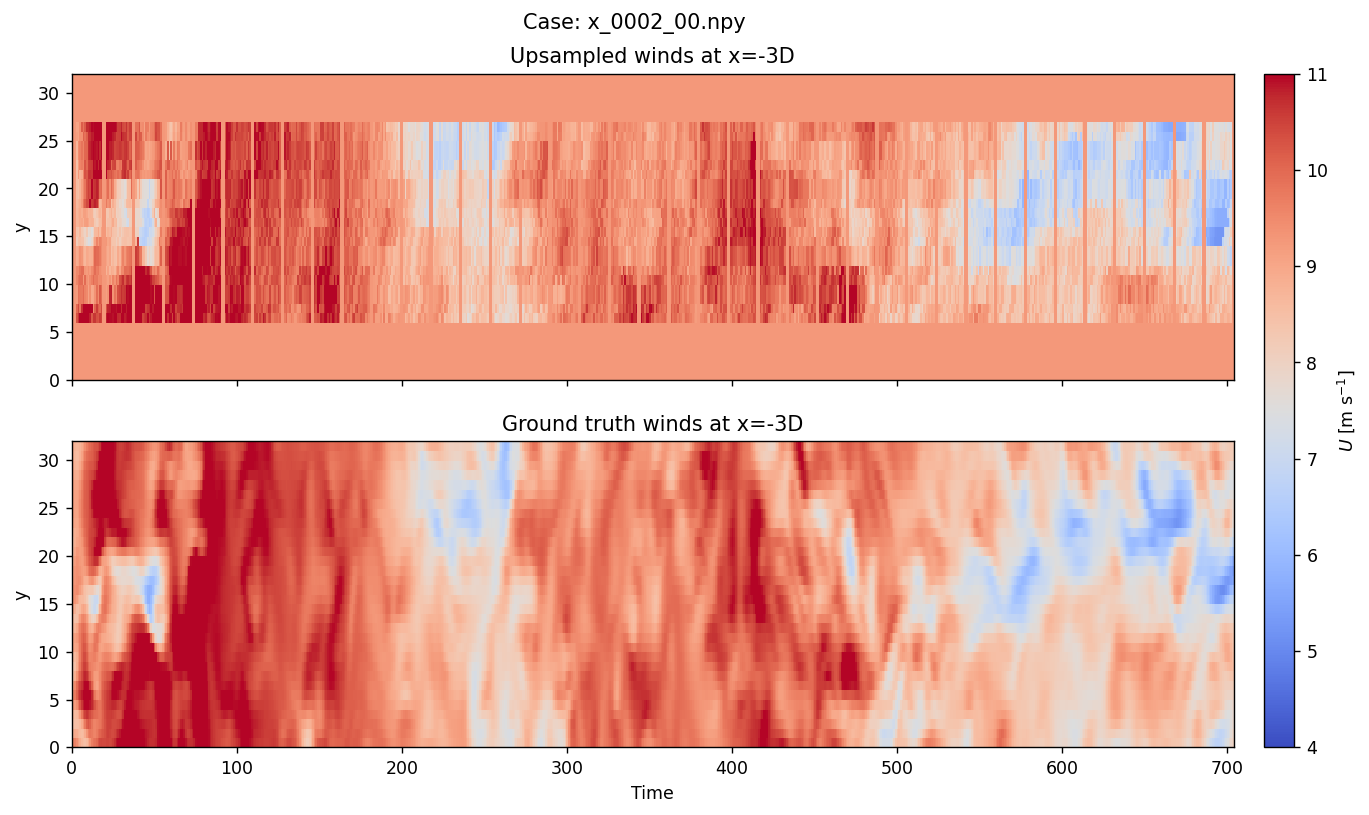

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(12, 7), dpi=125, sharex=True, sharey=True)

## Decorate
cmap = 'coolwarm'
ax[0].set_ylabel("y")
ax[1].set_ylabel("y")
ax[-1].set_xlabel("Time")

ax[0].set_title("Upsampled winds at x=-3D")
ax[1].set_title("Ground truth winds at x=-3D")
plt.suptitle('Case: '+fx_in.name, y=0.95)

data0 = x_in[0,:,:]
data1 = y_in[0,:,:]
# data1 = y_in[4,:,:]
# vmin = np.median(data0)-3
# vmax = np.median(data0)+3
vmin, vmax = 4, 11

im0 = ax[0].pcolor(data0.T,
                vmin=vmin,
                vmax=vmax,
                cmap=cmap,
                shading="auto")

im1 = ax[1].pcolor(data1.T,
                vmin=vmin,
                vmax=vmax,
                cmap=cmap,
                shading="auto")

# im1 = ax[1].pcolor(data1.T,
#                 cmap=cmap,
#                 shading="auto")

## Colorbars
cax0 = fig.add_axes([ax[-1].get_position().x1+0.02,
                     ax[-1].get_position().y0,
                     0.02,
                     ax[0].get_position().y1-ax[-1].get_position().y0])
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.set_label('$U$ [m s$^{-1}$]')
cbar0.ax.tick_params()

# ax[0].set_xlim(0, 240)

# plt.savefig('figs/demo_viz_training_data.png', bbox_inches='tight')

plt.show()